In [1]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
#from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
from matplotlib import pyplot as plt

# import torch
# import random

# !wget https://drive.google.com/drive/folders/13461-R08muyYnBQTq14z-OG8Tmy9o-5R?usp=share_link
# df = pd.read_csv('housing.csv')

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None, names=name)
# features = torch.tensor(np.hstack([df.values[::2, :], df.values[1::2, :2]]))
# labels = torch.tensor(df.values[1::2, 2])
# print(df)
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/gdrive/My Drive/Tmp/' # the absolute path to your file
# df = pd.read_csv(path + 'housing.csv')
# drive.flush_and_unmount()
# files.upload()
# df = pd.read_csv("C:/Tmp/housing.csv", sep=" ")
# df

## Загрузка данных

In [2]:
# Boston House Price dataset содержит 14 признаков с описанием:
# CRIM - уровень преступности на душу населения по городам
# ZN - доля жилых земель, зонированных под участки более 25,000 кв.футов
# INDUS - доля не розничных коммерческих площадей в городе
# CHAS - фиктивная переменная реки Чарльз (=1 если участок примыкает к реке; 0 иначе)
# NOX - концентрация оксидов азота (частей на 10 миллионов)
# RM - среднее количество комнат в жилище
# AGE - доля домов, построенных до 1940 года и занятых владельцами
# DIS - взвешенное расстояние до пяти бостонских центров занятости
# RAD - индекс доступности к радиальным магистралям
# TAX - полная ставка налога на имущество (на $10,000 стоимости)
# PTRATIO - соотношение учеников и учителей по городам
# B - 1000(Bk - 0.63)^2, где Bk - доля чернокожего населения
# LSTAT - процент населения с низким социальным статусом
# MEDV - Медианная стоимость домов, занимаемых владельцами (в $1000)

# Список названий колонок
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# чтение данных из файла
df = pd.read_csv("housing.csv", sep='\s+', names=columns, dtype=np.float32)

# Разделение на признаки и целевую переменную
features = df.drop('MEDV', axis=1)
labels = df['MEDV']

In [3]:
#print(features)
#print(labels)

# # Создание графиков
# plt.figure(figsize=(15, 20))

# # Создаем подграфики для всех 13 признаков
# for i, column in enumerate(columns[:-1]):  # Исключаем целевую переменную MEDV
#     plt.subplot(5, 3, i+1)
#     plt.title(column)
#     plt.scatter(features[:, i], labels, s=1, alpha=0.5)
#     plt.tight_layout()  # Автоматическая настройка отступов

# plt.show()

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136780,0.069170,0.554695,6.284634,68.574898,3.795043,9.549407,408.237152,18.455534,356.674042,12.653064,22.532806
std,8.601545,23.322390,6.860355,0.253993,0.115878,0.702617,28.148869,2.105711,8.707269,168.537170,2.164946,91.294838,7.141063,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [6]:
# Стандартизация признаков (Z-нормализация)
scaler = StandardScaler()
features = pd.DataFrame(data=scaler.fit_transform(features), columns=features.columns)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    labels,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Преобразование в тензоры
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

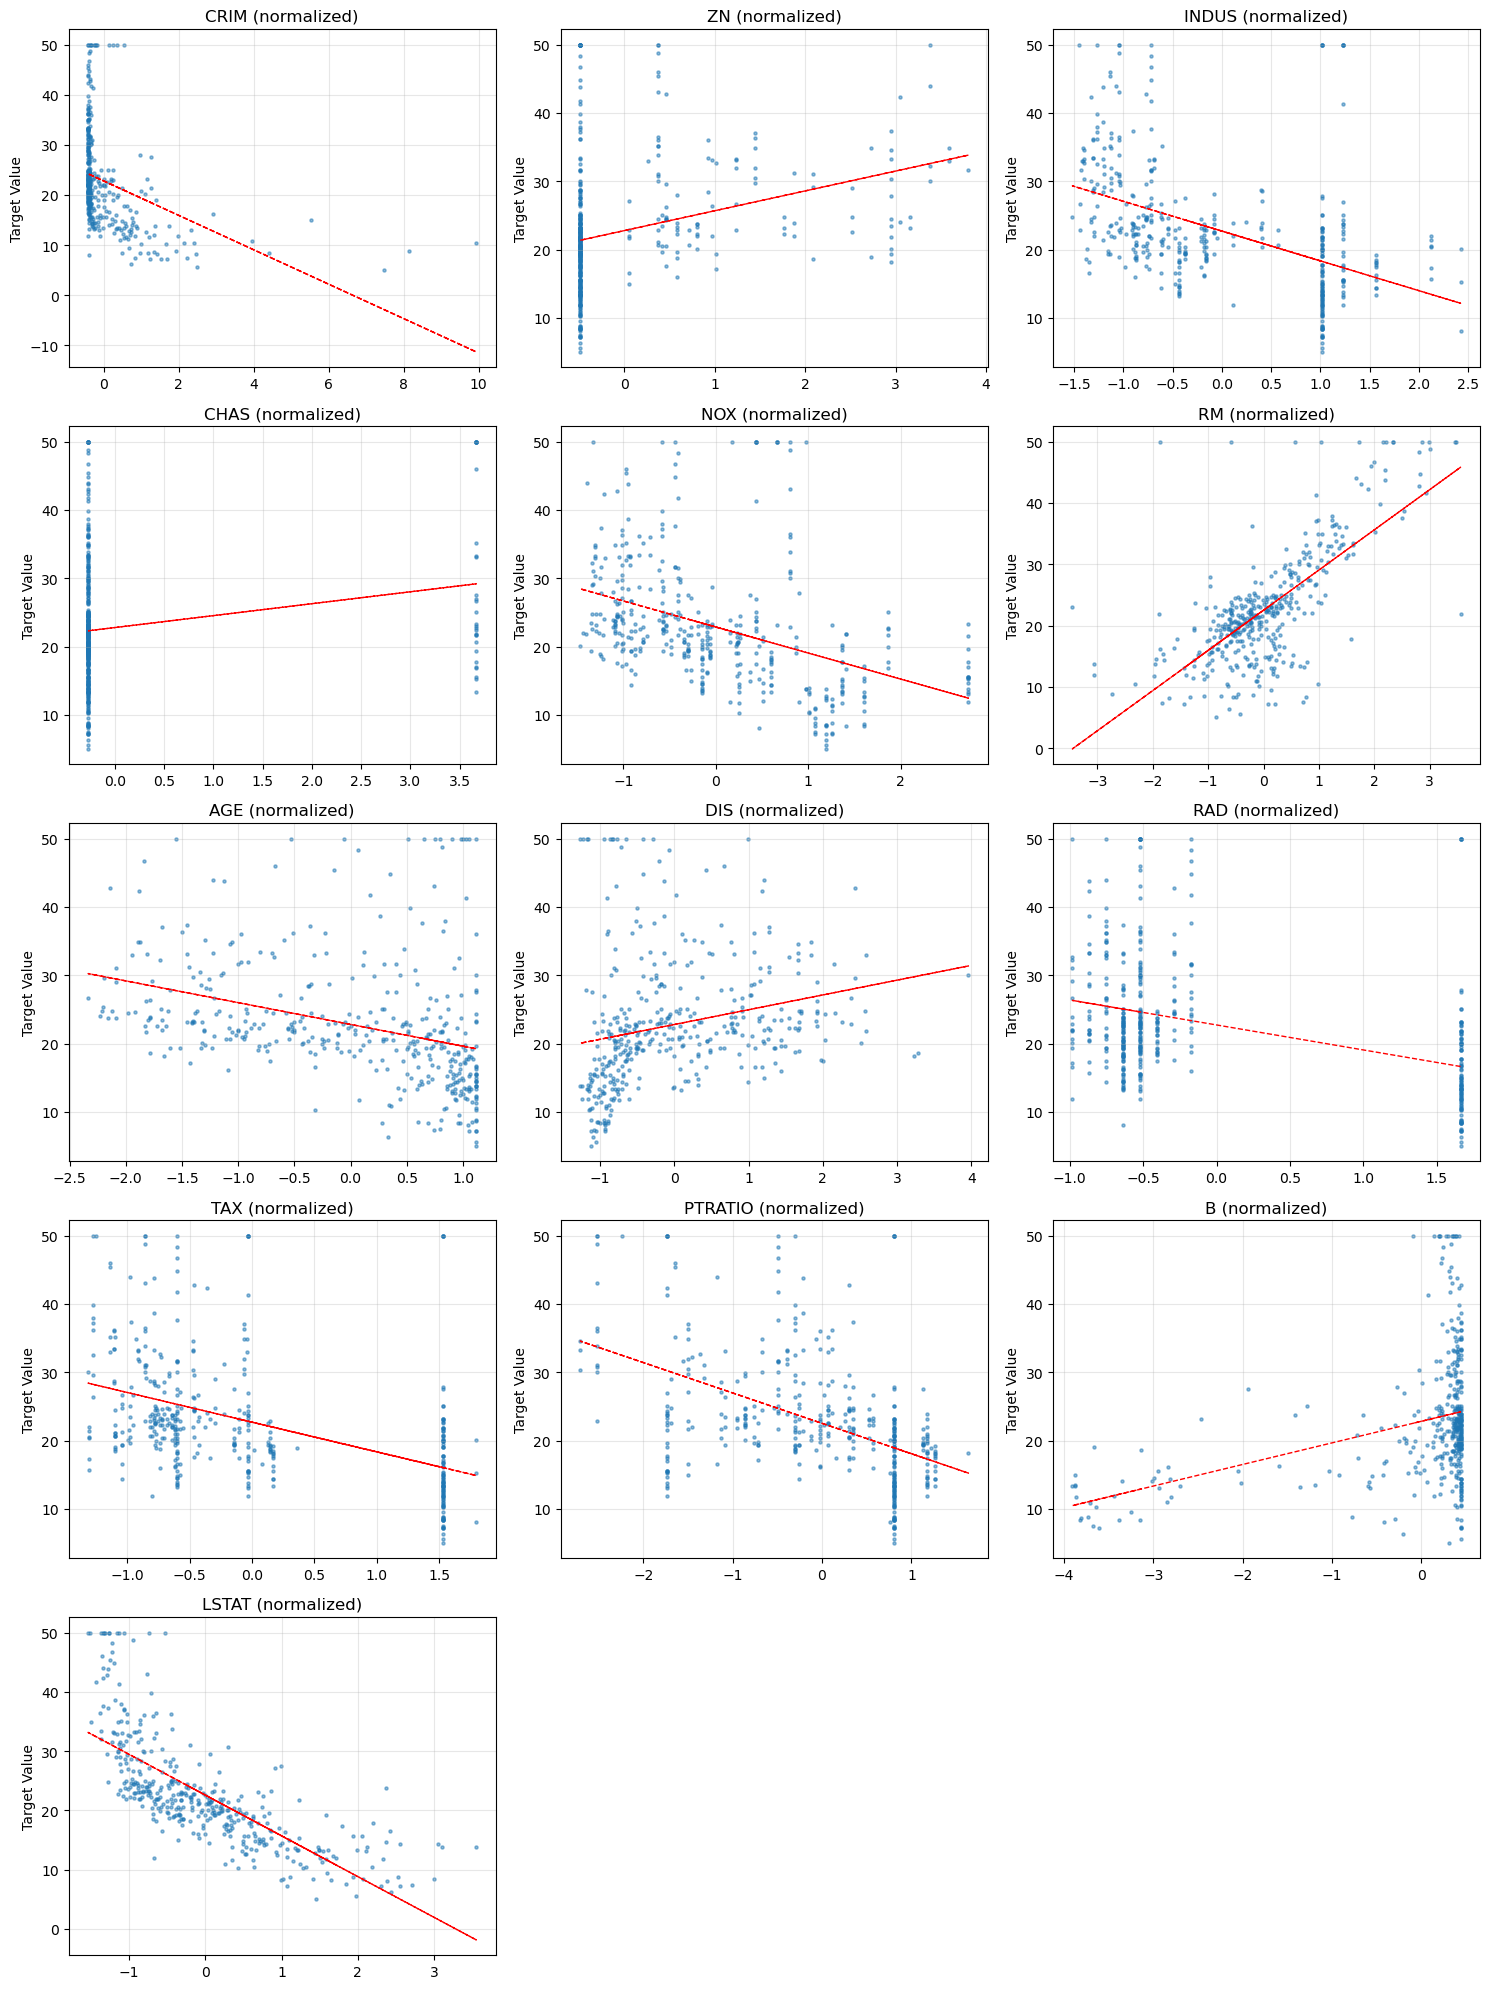

In [7]:
# Создание графиков после стандартизации
plt.figure(figsize=(15, 20))

# Для каждого признака
for i in range(X_train_tensor.shape[1]):
    plt.subplot(5, 3, i+1)
    
    # Преобразование тензоров в numpy для визуализации
    feature = X_train_tensor[:, i].numpy()  # Тензор -> numpy array
    target = y_train_tensor
    
    # Построение графика
    plt.scatter(feature, target, s=5, alpha=0.5)
    plt.title(f'{columns[i]} (normalized)')
    plt.ylabel('Target Value')
    plt.grid(True, alpha=0.3)
    
    # Линия регрессии
    slope, intercept = np.polyfit(feature, target, 1)
    plt.plot(feature, intercept + slope*feature, 
             color='red', 
             linewidth=1,
             linestyle='--')

plt.tight_layout()
plt.show()

## Создание модели и определение параметров

In [8]:
# Создание модели
class Network(torch.nn.Module):
    def __init__(self, X_size, y_size):
        super(Network, self).__init__()   
        self.linear = torch.nn.Linear(X_size, y_size) # Создание линейного слоя
    
    def forward(self, x):
        return self.linear(x)


In [9]:
# Определение параметров
X_size = X_train_tensor.shape[1]        # Размерность входа
y_size = 1                              # Размерность выхода
learning_rate = 0.1                     # Темп обучения
num_epochs = 30                         # Количество эпох
batch_size = X_train_tensor.shape[0]    # Размер батча

In [10]:
# Нейронная сеть
model = Network(
    X_size,
    y_size
)

# Функция потерь среднеквадратичной ошибки (MSE), 
# которая будет усреднять потери по всем элементам батча
criterion = torch.nn.MSELoss(reduction='mean')

# Оптимизатор стохастического градиентного спуска (SGD) 
# для обучения модели с заданной скоростью обучения
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Датасет, объединяющий входные данные (X_train) и целевые значения (y_train)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_test_tensor, y_test_tensor)

## Обучение и проверка

In [11]:
best_val_loss = float('inf')
patience = 5
patience_counter = 0

# Инициализация DataLoader с перемешиванием данных для обучения
train_loader = DataLoader(dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)

for epoch in range(1, num_epochs + 1):
    model.train()  # Переключение в режим обучения
    
    # Обучение на тренировочных данных
    for X, y in train_loader: 
        loss = criterion(model(X).reshape(-1), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Валидация
    model.eval()  # Переключение в режим оценки
    val_loss = 0
    with torch.no_grad():  # Отключение вычисления градиентов
        for X_val, y_val in val_loader:
            val_l = criterion(model(X_val).reshape(-1), y_val)
            val_loss += val_l.item()
    val_loss /= len(val_loader)  # Нормализация по количеству батчей
    
    # Ранняя остановка
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Сохранение лучшей модели
    else:
        patience_counter += 1
    
    # Вывод статистики каждой эпохи
    if (epoch + 1) % 3 == 0:
        print(f'Epoch {epoch + 1}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')
    
    if patience_counter >= patience:
        print("Early stopping!")
        break

# Загрузка лучших весов модели
model.load_state_dict(torch.load('best_model.pth'))

Epoch 3, Train Loss: 371.1049, Val Loss: 241.7523
Epoch 6, Train Loss: 111.1596, Val Loss: 88.9120
Epoch 9, Train Loss: 46.3526, Val Loss: 45.5707
Epoch 12, Train Loss: 29.3275, Val Loss: 32.8716
Epoch 15, Train Loss: 24.6274, Val Loss: 28.9129
Epoch 18, Train Loss: 23.2120, Val Loss: 27.5280
Epoch 21, Train Loss: 22.7061, Val Loss: 26.9361
Epoch 24, Train Loss: 22.4701, Val Loss: 26.6069
Epoch 27, Train Loss: 22.3260, Val Loss: 26.3760
Epoch 30, Train Loss: 22.2215, Val Loss: 26.1899


<All keys matched successfully>